In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.image as mpimg

(512, 512, 3)


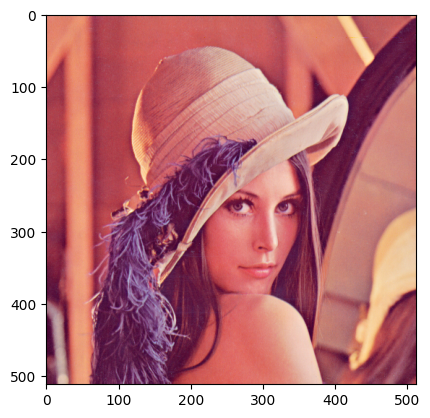

In [ ]:

img = mpimg.imread("/lena_std.tif")

def imshow(img):
    if len(img.shape) < 3:
        plt.imshow(img, cmap="gray")
    elif img.shape[2] == 1:
        plt.imshow(np.resize(img,(img.shape[0],img.shape[1])), cmap="gray")
    else:
        plt.imshow(img)


if len(img.shape) < 3:
    img.resize(*img.shape,1)

imshow(img)

print(img.shape)

True

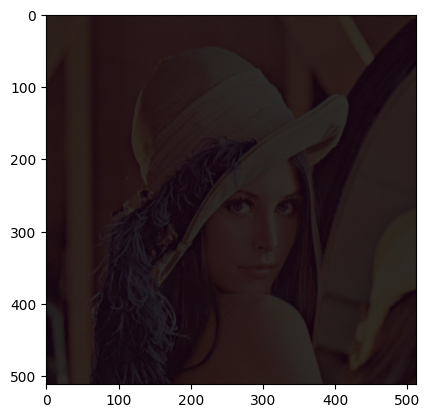

In [ ]:
# Gamma Coorection
def gammaCorrection(img, gamma):
    out = np.power(img.copy(), gamma)
    return out.astype(np.uint8)

imshow(gammaCorrection(img,0.7))


cv2.imwrite("gamma.jpg",img)

 ========================================= Low Pass Filter =========================================


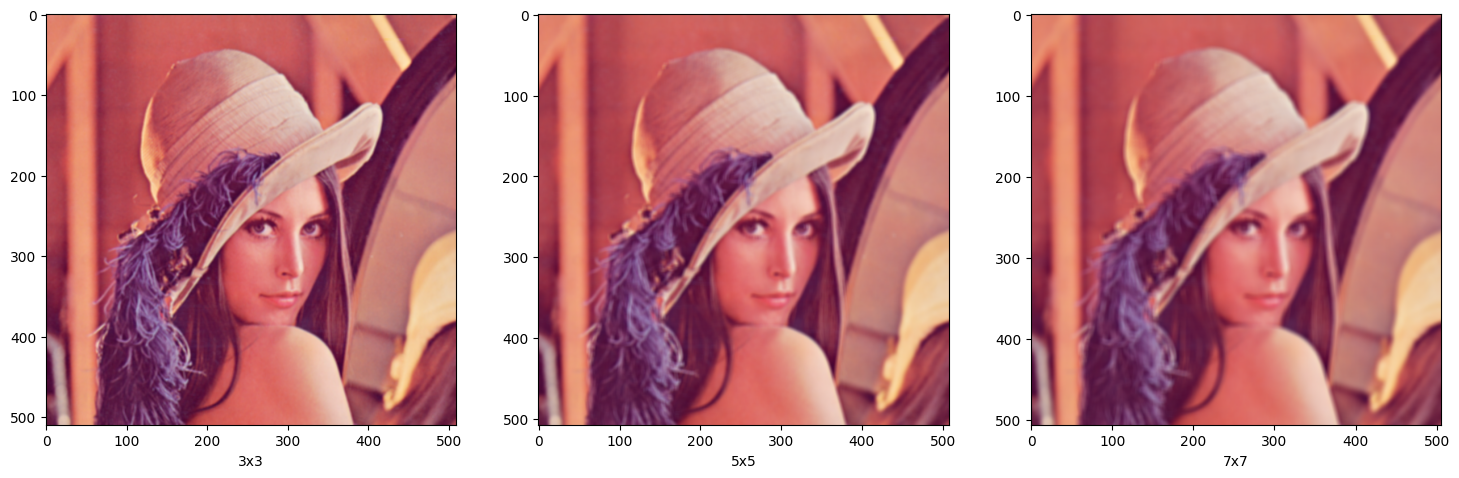

<Figure size 1800x1600 with 0 Axes>

In [ ]:
def conv(image, filter):
    iw,ih,id = image.shape

    fw,fh = filter.shape
    out = np.zeros((iw-fw+1,ih-fh+1,id))

    for d in range(id):
        for w in range(ih-fh+1):
            for h in range(iw-fw+1):
                out[w,h,d] = np.sum(filter*image[w:w+fh , h:h+fw , d])

    if id == 1:
        return np.resize(out, (out.shape[0], out.shape[1])).astype(np.uint8)
    else:
        return out.astype(np.uint8)




fig = plt.figure(1, figsize=(18, 16))
print(" ========================================= Low Pass Filter =========================================")
for i in range(3,8,2):
    splot = plt.subplot(130-1+((i+1)//2))
    splot.set_xlabel(str(i)+"x"+str(i))
    (lpfw,lpfh) = (i,i)
    lowPassFilter = np.ones((lpfw,lpfh))*1/(lpfw*lpfh)
    low_image = conv(img, lowPassFilter)
    imshow(low_image)
    cv2.imwrite("low"+str(i)+"x"+str(i)+".jpg",low_image)
plt.show()

print()
fig = plt.figure(2, figsize=(18, 16))




In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Colab

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Colab

# Load the Lenna image in TIFF format
image_path = '/content/lena_std.tif'

In [ ]:
# Convert the image to grayscale for filtering
lenna_image = cv2.imread(image_path)
gray_lenna = cv2.cvtColor(lenna_image, cv2.COLOR_BGR2GRAY)

In [ ]:
 # High-pass filter
kernel_hp = np.array([[-1, -1, -1],
                          [-1,  8, -1],
                          [-1, -1, -1]])
high_pass_result = cv2.filter2D(gray_lenna, -1, kernel_hp)

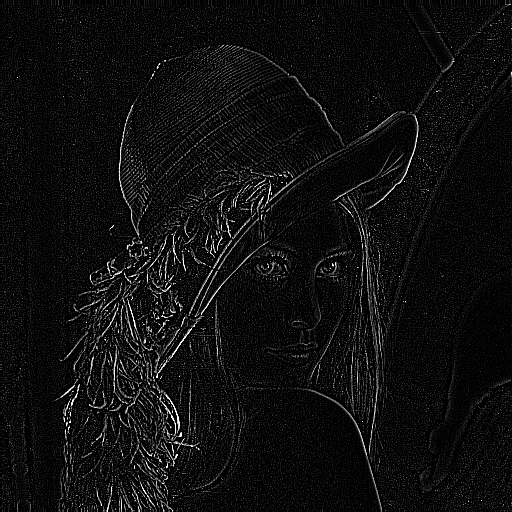

In [ ]:
cv2_imshow(high_pass_result)

In [ ]:
 # Low-pass filter (Gaussian blur)
low_pass_result = cv2.GaussianBlur(gray_lenna, (5, 5), 0)

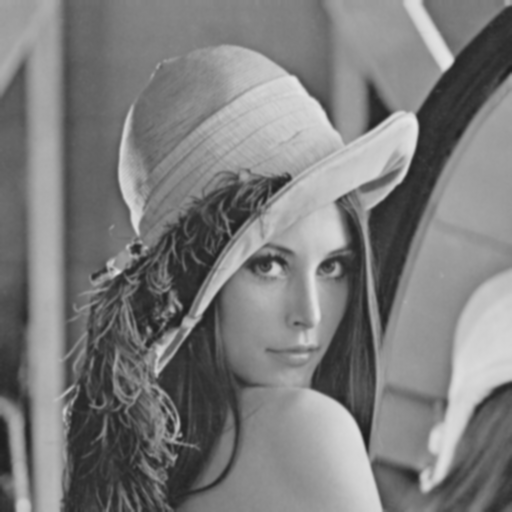

In [ ]:
cv2_imshow(low_pass_result)